In [203]:
#libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,confusion_matrix,accuracy_score,precision_score,precision_score,recall_score,f1_score
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
import numpy as np
import pickle

In [204]:
#display the data and data info
df=pd.read_csv('../data/diabetes.csv')
display(df.head())
display(df.columns)
display(df.info())
display(df.describe())

,Gender,Total Body Water,Initial Weight,lost weight,Time,Body Fat Mass,Dry Lean Mass,Age,Trainer
0,0,55,100,60,10,23.0,73,22,1
1,0,51,80,50,20,26.6,80,21,1
2,1,57,81,10,100,12.3,77,21,3
3,1,56,90,20,90,14.1,81,23,4
4,1,60,100,25,80,11.7,86,22,5


Index(['Gender', 'Total Body Water', 'Initial Weight', 'lost weight', 'Time',
       'Body Fat Mass', 'Dry Lean Mass', 'Age', 'Trainer'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 9 columns):
Gender              65 non-null int64
Total Body Water    65 non-null int64
Initial Weight      65 non-null int64
lost weight         65 non-null int64
Time                65 non-null int64
Body Fat Mass       65 non-null float64
Dry Lean Mass       65 non-null int64
Age                 65 non-null int64
Trainer             65 non-null int64
dtypes: float64(1), int64(8)
memory usage: 4.6 KB


None

,Gender,Total Body Water,Initial Weight,lost weight,Time,Body Fat Mass,Dry Lean Mass,Age,Trainer
count,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000,65.000000
mean,0.476923,55.476923,95.892308,32.215385,78.184615,19.469231,80.230769,21.815385,3.153846
std,0.503354,3.010958,12.406051,18.818618,27.647272,6.901855,5.738492,0.899519,1.612750
min,0.000000,51.000000,80.000000,10.000000,10.000000,9.900000,71.000000,20.000000,1.000000
25%,0.000000,52.000000,88.000000,17.000000,81.000000,12.300000,76.000000,21.000000,1.000000
50%,0.000000,56.000000,98.000000,22.000000,86.000000,21.800000,79.000000,22.000000,3.000000
75%,1.000000,58.000000,103.000000,55.000000,94.000000,25.600000,85.000000,23.000000,5.000000
max,1.000000,60.000000,120.000000,60.000000,100.000000,29.200000,90.000000,23.000000,5.000000


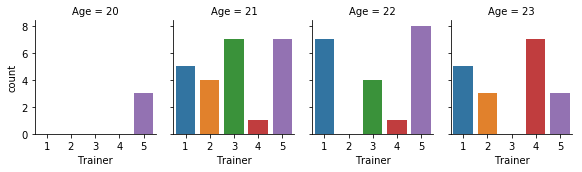

In [205]:
#some data visualization 
g = sns.catplot(col="Age",x="Trainer", col_wrap=4,kind="count", data=df,height=2.5, aspect=.8)

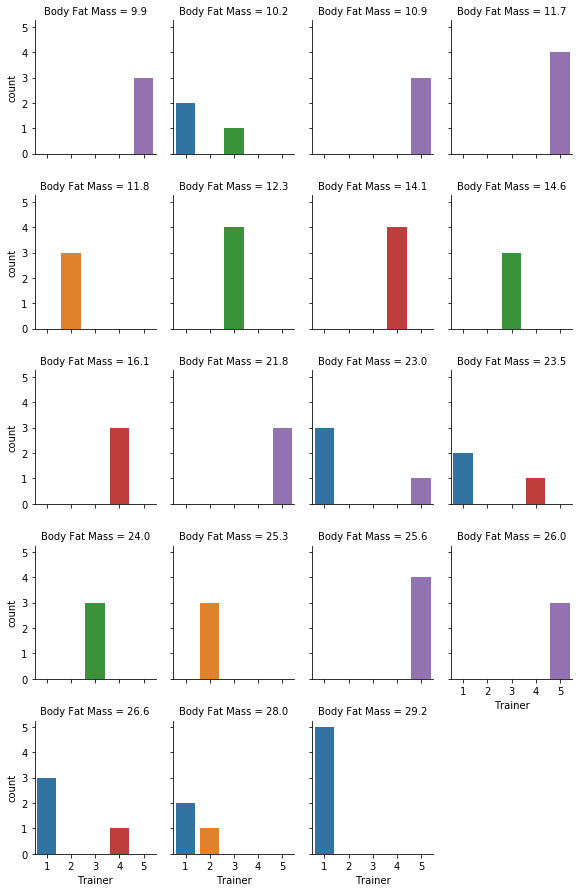

In [206]:
#some data visualization 
g = sns.catplot(col="Body Fat Mass",x="Trainer", col_wrap=4,kind="count", data=df,height=2.5, aspect=.8)

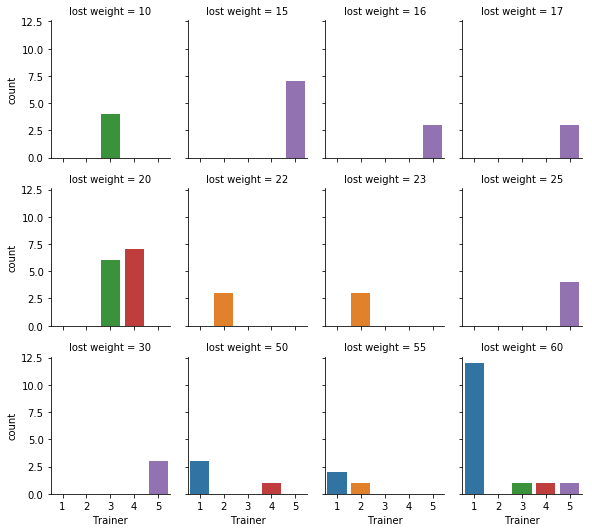

In [207]:
#some data visualization 
g = sns.catplot(col="lost weight",x="Trainer", col_wrap=4,kind="count", data=df,height=2.5, aspect=.8)

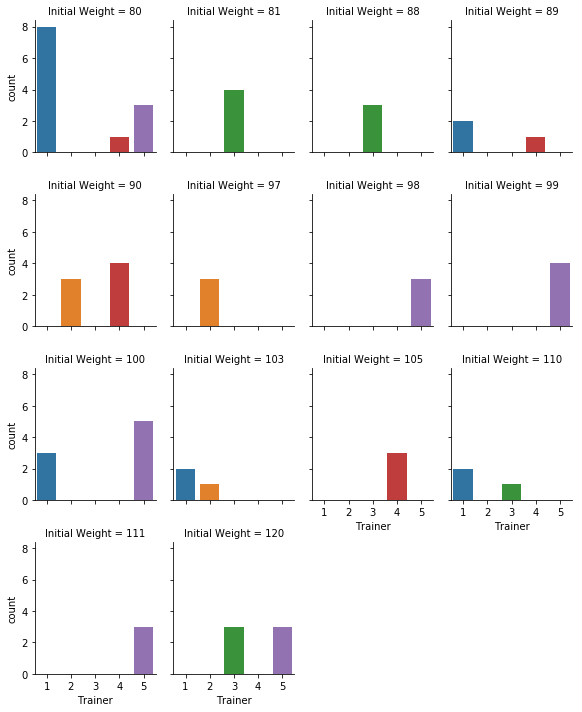

In [208]:
#some data visualization 
g = sns.catplot(col="Initial Weight",x="Trainer", col_wrap=4,kind="count", data=df,height=2.5, aspect=.8)

Text(0,0.5,'Number of patients')

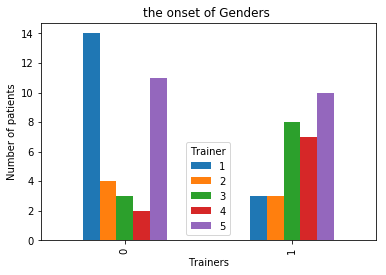

In [209]:
#some data visualization 
pd.crosstab(df.Gender,df.Trainer).plot(kind='bar')
plt.title('the onset of Genders ')
plt.xlabel('Trainers')
plt.ylabel('Number of patients')


Text(0,0.5,'Number of patients')

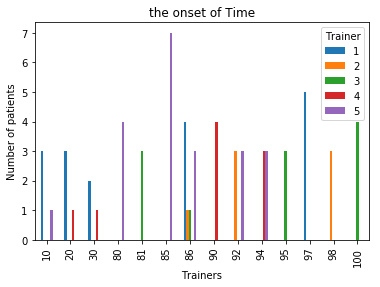

In [210]:
#some data visualization 
pd.crosstab(df.Time,df.Trainer).plot(kind='bar')
plt.title('the onset of Time')
plt.xlabel('Trainers')
plt.ylabel('Number of patients')


Text(0,0.5,'Number of patients')

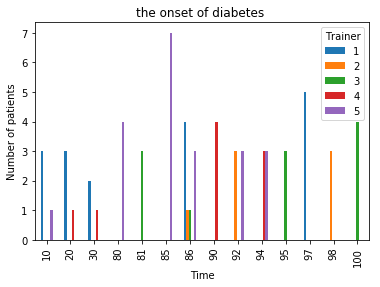

In [211]:
#some data visualization 
pd.crosstab(df.Time,df.Trainer).plot(kind='bar')
plt.title('the onset of diabetes ')
plt.xlabel('Time')
plt.ylabel('Number of patients')


In [212]:
#split the data into x and y
X=df[['Age','Dry Lean Mass','Body Fat Mass','Time','lost weight','Initial Weight','Total Body Water','Gender']]
Y=df[['Trainer']]

In [213]:
#split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2, random_state=0)

In [214]:
#maka an object of logestic regression and fit the training data
clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(X_train, y_train)
y_pred=clf.predict(X_test)

E:\Sources\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [227]:
#gradient boost classifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)




# save model to file
pickle.dump(gbc, open("pima.pickle.h5py", "wb"))




score=gbc.score(X_test, y_test)
print("accuracy of gradient boast classifier",round(score*100,2))

E:\Sources\Anaconda\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


accuracy of gradient boast classifier 92.31


In [224]:
#display the accuracy , precision , recall and f1 scores  of logestic
accuracy=accuracy_score(y_test, y_pred)
precision=precision_score(y_test, y_pred,average='macro')
recall=recall_score(y_test, y_pred,average='macro')
f1score=f1_score(y_test, y_pred,average='macro')
print('accuracy is {}'.format(round(accuracy*100,2)))
print('precision is {}'.format(round(precision*100,2)))
print('recall is {}'.format(round(recall*100,2)))
print('f1_score is {}'.format(round(f1score*100,2)))




accuracy is 76.92
precision is 85.33
recall is 78.33
f1_score is 80.0


Normalized confusion matrix
[[1.         0.         0.         0.         0.        ]
 [0.         1.         0.         0.         0.        ]
 [0.         0.         0.66666667 0.         0.33333333]
 [0.         0.         0.         0.5        0.5       ]
 [0.         0.         0.25       0.         0.75      ]]


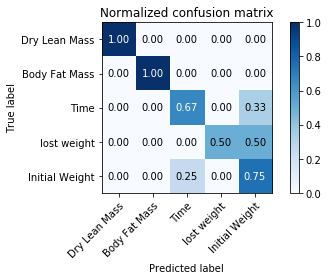

In [189]:
#plot the confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


#np.set_printoptions(precision=2)


# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=X.columns, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [200]:
loaded_model = pickle.load(open("pima.pickle.dat", "rb"))
# make predictions for test data
y_pred = loaded_model.predict([[23,85,29,97,60,80,58,1]])
predictions = [round(value) for value in y_pred]
print(predictions)
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

[1]
